In [87]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
from scipy.signal import convolve2d
from scipy.misc import imresize

def show(*args):
    f, axis = plt.subplots(1,len(args))
    for (image,i) in zip(args,range(len(args))):
        axis[i].imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show()

def normalize(arr):
    arr *= 255.0/(arr.max())
    return arr


# Code.1) Gaussian Pyramid

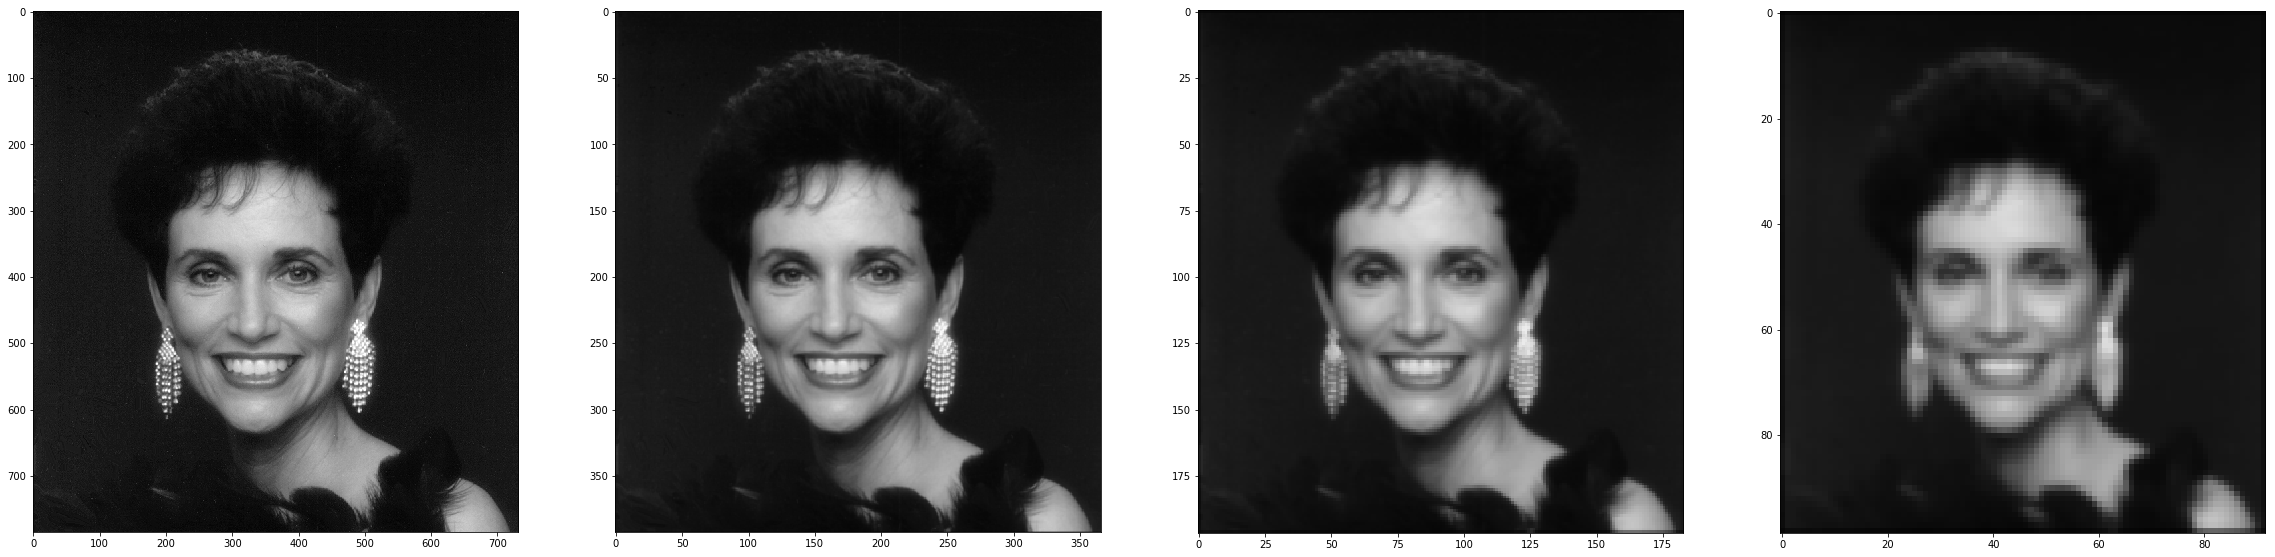

In [89]:
K_gaussian = np.array(
	[[1,4,7,4,1],
	[4,16,26,16,4], 
	[7,26,41,26,7], 
	[4,16,26,16,4], 
	[1,4,7,4,1]], dtype=np.float64) / 273.0

# Gaussian - Layer 1
G0 = imageio.imread("woman.png")
G0_s = convolve2d(G0, K_gaussian, mode='same', boundary='fill')
G1 = G0_s[::2,::2]

# Gaussian - Layer 2
G1_s = convolve2d(G1, K_gaussian, mode='same', boundary='fill')
G2 = G1_s[::2,::2]

# Gaussian - Layer 3
G2_s = convolve2d(G2, K_gaussian, mode='same', boundary='fill')
G3 = G2_s[::2,::2]

show(G0, G1, G2, G3)

# Code.2) Laplacian Pyramid

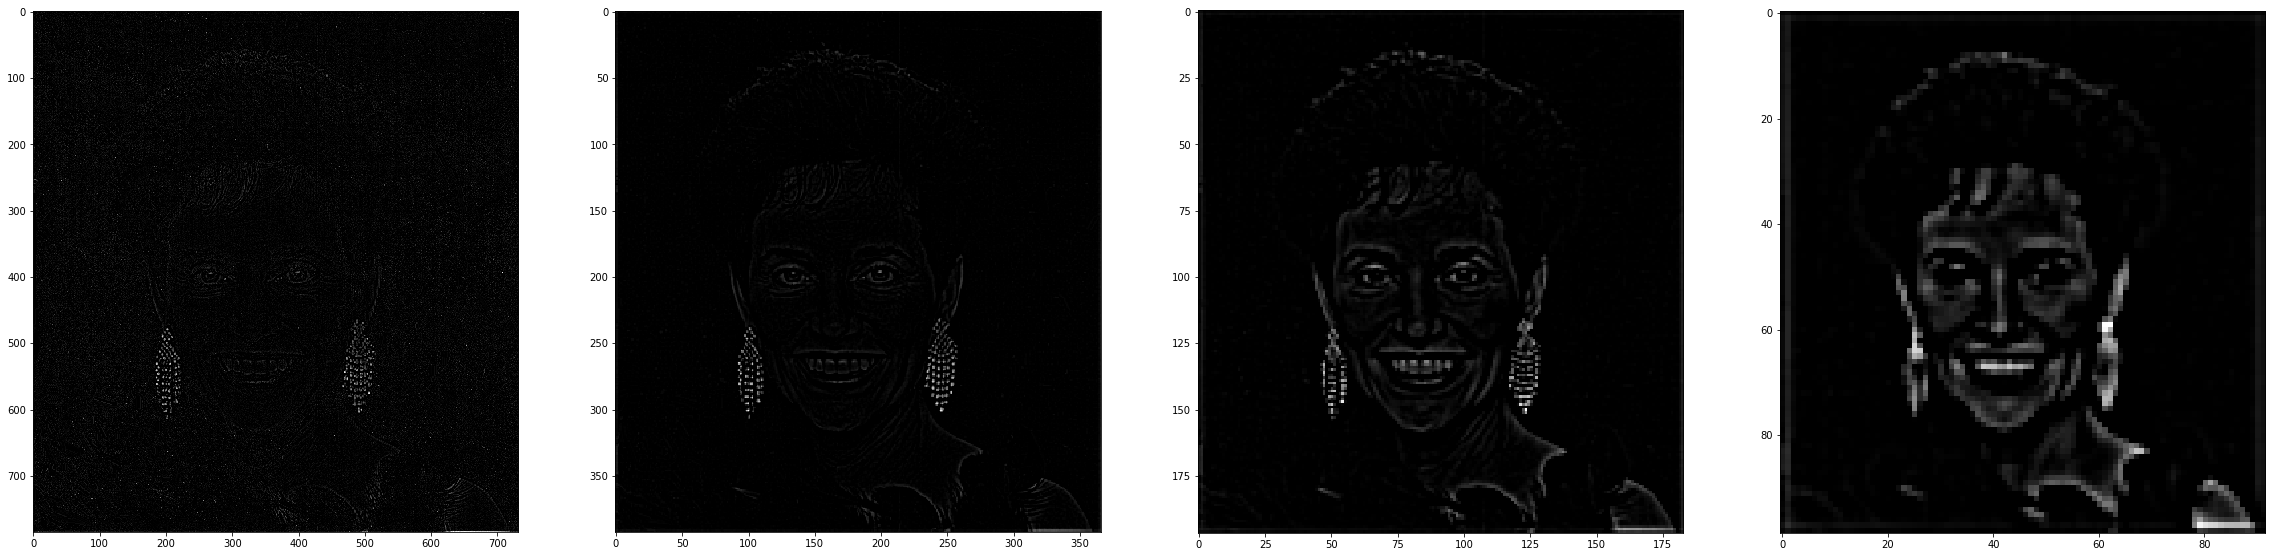

In [91]:
G3_s = convolve2d(G3, K_gaussian, mode='same', boundary='fill')

L0 = normalize(G0 - G0_s)
L1 = normalize(G1 - G1_s)
L2 = normalize(G2 - G2_s)
L3 = normalize(G3 - G3_s)
show(L0,L1,L2,L3)

# Other.1)

In [109]:
H = np.array([[ 1,0,0],
              [ 0,0,0],
              [ 0,0,0]], dtype=np.float64)

# Padded with zeroes
I = np.array([[ 1 ]], dtype=np.float64)

HxI = correlate2d(H,I, boundary="fill", fillvalue=0)
IxH = correlate2d(I,H, boundary="fill", fillvalue=0)

print("HxI\n",HxI,"\n")
print("IxH\n",IxH,"\n")
print("HxI == IxH :", np.array_equal(HxI,IxH))


HxI
 [[1. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

IxH
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 1.]] 

HxI == IxH : False


# Other.2)
### .1)

Def.:
$ H*F(i,j)=\sum^{k}_{u=-k}\sum^{k}_{v=-k}H(u,v)F(i-u,j-v)$

Show: $ (\alpha H)*F = \alpha (H*F) $

Proof:

$\begin{align}
(\alpha H)*F &=\sum^{k}_{u=-k}\sum^{k}_{v=-k}\alpha H(u,v)F(i-u,j-v)\\
&\Leftrightarrow \alpha \sum^{k}_{u=-k}\sum^{k}_{v=-k}H(u,v)F(i-u,j-v)\\
&\Leftrightarrow \alpha (H*F)\\
\end{align}$

### .2)

Def.:
$ H*F(i,j)=\sum^{k}_{u=-k}\sum^{k}_{v=-k}H(u,v)F(i-u,j-v)$

Show: $ H*(F_1+F_2) = (H*F_1)+(H*F_2) $

Proof:

$\begin{align}
H*(F_1+F_2) &=\sum^{k}_{u=-k}\sum^{k}_{v=-k} H(u,v)\cdot(F_1(i-u,j-v)+F_2(i-u,j-v))\\
            &=\sum^{k}_{u=-k}\sum^{k}_{v=-k}(H(u,v)\cdot F_1(i-u,j-v))+(H(u,v)\cdot F_2(i-u,j-v))\\
            &=\sum^{k}_{u=-k}\sum^{k}_{v=-k}(H(u,v)\cdot F_1(i-u,j-v))+ \sum^{k}_{u=-k}\sum^{k}_{v=-k}(H(u,v)\cdot F_2(i-u,j-v))\\
            &=(H*F_1)+(H*F_2)\\
\end{align}$

# Other.3)

Def.:
$ H*F=\sum^{\infty}_{u=-\infty}\sum^{\infty}_{v=-\infty}H(u,v)F(i-u,j-v)$

Show: $ H*F = F*H $

Proof:

### 1. Prepare substitution of u

$\textbf{U} = i - u \Leftrightarrow  u = \textbf{U}-i
~\\~\\
\begin{align}
u &= -\infty &&\Rightarrow \textbf{U} = i - (-\infty) &&&= \infty\\
u &=  \infty &&\Rightarrow \textbf{U} = i - \infty &&&= -\infty
\end{align}$

### 2. Prepare substitution of v

$\textbf{V} = j-v \Leftrightarrow  v = \textbf{V}-j
~\\~\\
\begin{align}
v &= -\infty &&\Rightarrow \textbf{V} = j - (-\infty) &&&= \infty\\
v &=  \infty &&\Rightarrow \textbf{V} = j - \infty &&&= -\infty
\end{align}$

### 3. Substituting

$$\begin{align}
H*F
              =&\sum^{\infty}_{u=-\infty}\sum^{\infty}_{v=-\infty} H(u,v)F(i-u,j-v)&&| \text{Substituting u & v for U & V}\\
\Leftrightarrow&\sum^{-\infty}_{U=\infty}\sum^{-\infty}_{V=\infty} H(U-i,V-i)F(U,V)&&| \text{Rearranging order of summation}\\
\Leftrightarrow&\sum^{\infty}_{U=-\infty}\sum^{\infty}_{V=-\infty} H(U-i,V-i)F(U,V)&&| \text{Commutativity of multiplication}\\
\Leftrightarrow&\sum^{\infty}_{U=-\infty}\sum^{\infty}_{V=-\infty} F(U,V)H(U-i,V-i)\\
              =& F*H
\end{align}$$

